# Student Performance Indicator
## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model
1) Problem statement
-    This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
-    Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.
## 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(r'D:\My\My_Projects\ML_Projects\ETE_ML\notebook')

##### Importing the CSV data using Pandas DataFrame and viewing the dataset using head()

In [3]:
data = pd.read_csv('stud.csv')
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### Shape of the data

In [4]:
data.shape

(1000, 8)

#### Checking null Values and data types of the features

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
categories=['gender','race_ethnicity','lunch','test_preparation_course']
for i in categories:
    print(f'Categories in {i}: {data[i].unique()}')
    print('**********'*10)

Categories in gender: ['female' 'male']
****************************************************************************************************
Categories in race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
****************************************************************************************************
Categories in lunch: ['standard' 'free/reduced']
****************************************************************************************************
Categories in test_preparation_course: ['none' 'completed']
****************************************************************************************************


In [7]:
print('Value Counts')
for column in data.columns:
    print(f'########################## {column} #################################')
    print(data[column].value_counts())
    print('***'*10)
    print()

Value Counts
########################## gender #################################
female    518
male      482
Name: gender, dtype: int64
******************************

########################## race_ethnicity #################################
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64
******************************

########################## parental_level_of_education #################################
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64
******************************

########################## lunch #################################
standard        645
free/reduced    355
Name: lunch, dtype: int64
******************************

########################## test_preparation_course #################################
none         642
completed    358
Name:

#### Defining Numerical and Categorical features

In [8]:
categorical_features = [column for column in data.columns if data[column].dtype == 'O']
numerical_features = [column for column in data.columns if data[column].dtype!='O' ]

print('Categorical Features: ',categorical_features)
print()
print('Numerical Features: ',numerical_features)

Categorical Features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

Numerical Features:  ['math_score', 'reading_score', 'writing_score']


#### Adding Columns for Total_Score and Average_Score

In [9]:
data['Total_Score']=data['math_score']+data['reading_score']+data['writing_score']
data['Average_Score']=data['Total_Score']/3
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


#### Count of Students with full marks

In [10]:
reading_full=data[data['reading_score']==100].count()['reading_score']
writing_full=data[data['writing_score']==100].count()['writing_score']
maths_full=data[data['math_score']==100].count()['math_score']

print('No of Students with full marks in Maths: ',maths_full)
print('No of Students with full marks in Reading: ',reading_full)
print('No of Students with full marks in Writing: ',writing_full)

No of Students with full marks in Maths:  7
No of Students with full marks in Reading:  17
No of Students with full marks in Writing:  14


#### Count of Sudents with least marks

In [11]:
less_reading=data[data['reading_score']<=20].count()['reading_score']
less_writing=data[data['writing_score']<=20].count()['writing_score']
less_maths=data[data['math_score']<=20].count()['math_score']

print('No of Students with least marks (at most 20) in Maths: ',less_maths)
print('No of Students with least marks (at most 20) in Reading: ',less_reading)
print('No of Students with least marks (at most 20) in Writing: ',less_writing)

No of Students with least marks (at most 20) in Maths:  4
No of Students with least marks (at most 20) in Reading:  1
No of Students with least marks (at most 20) in Writing:  3


### Data Visualization

#### Results based on gender

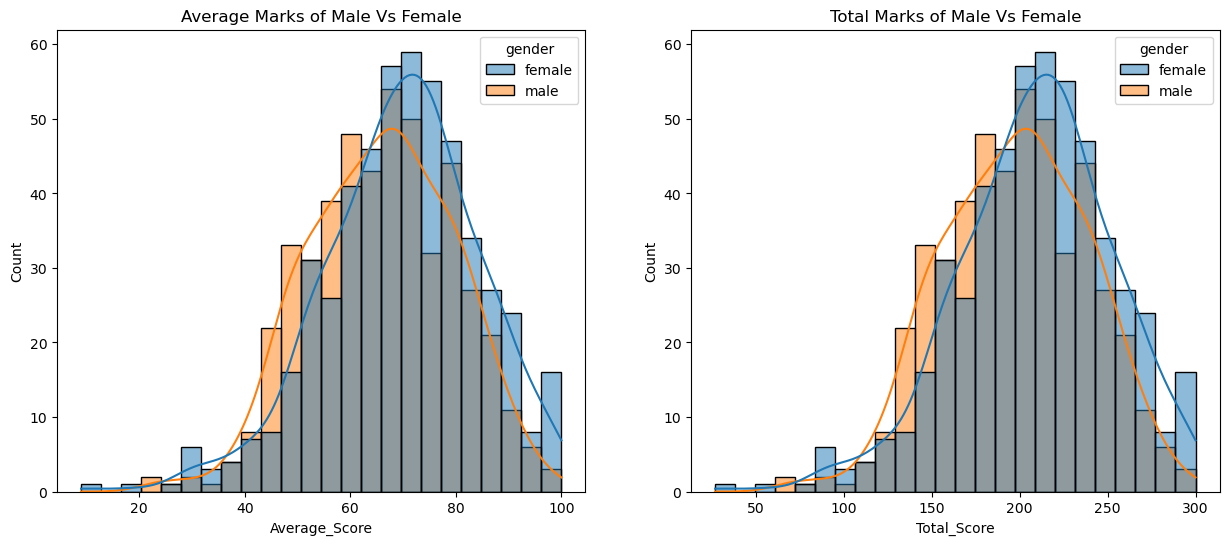

In [12]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sns.histplot(data,x='Average_Score',hue='gender',kde=True)
plt.title('Average Marks of Male Vs Female')
plt.subplot(122)
sns.histplot(data,x="Total_Score",hue='gender',kde=True)
plt.title('Total Marks of Male Vs Female')
plt.show()

- Female Students tends to perform well than male Students

#### Results based on preparation Course

Text(0.5, 1.0, 'Average Score of Male Students based on their preperation course completion')

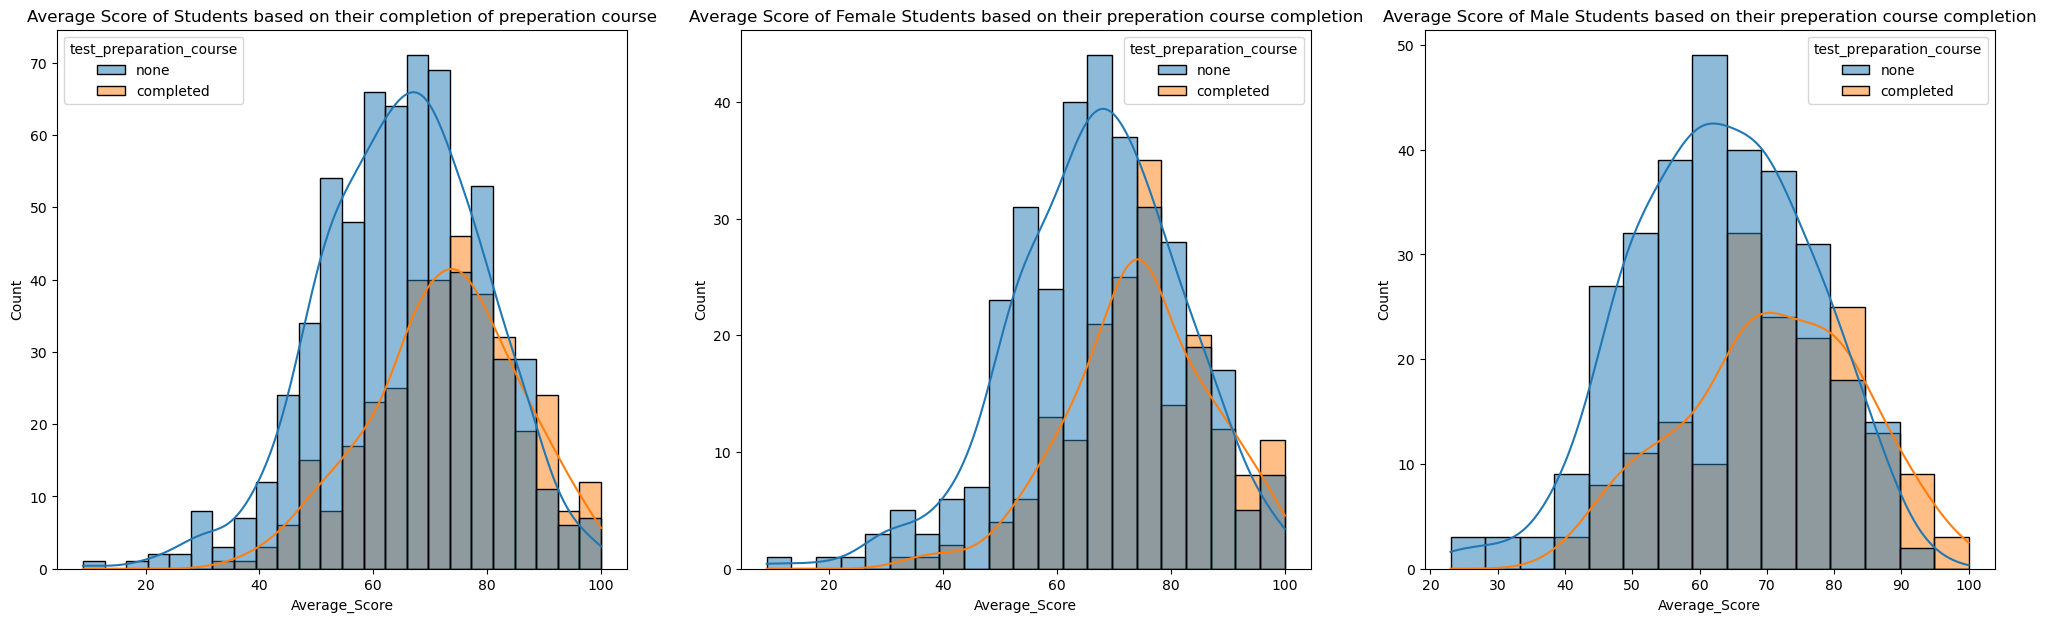

In [18]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data,x='Average_Score',hue='test_preparation_course',kde=True)
plt.title('Average Score of Students based on their completion of preperation course')

plt.subplot(132)
sns.histplot(data=data[data.gender=='female'],x='Average_Score',hue='test_preparation_course',kde=True)
plt.title('Average Score of Female Students based on their preperation course completion')

plt.subplot(133)
sns.histplot(data=data[data.gender=='male'],x='Average_Score',hue='test_preparation_course',kde=True)
plt.title('Average Score of Male Students based on their preperation course completion')

Text(0.5, 1.0, 'Average Score of Male Students based on their parents Education')

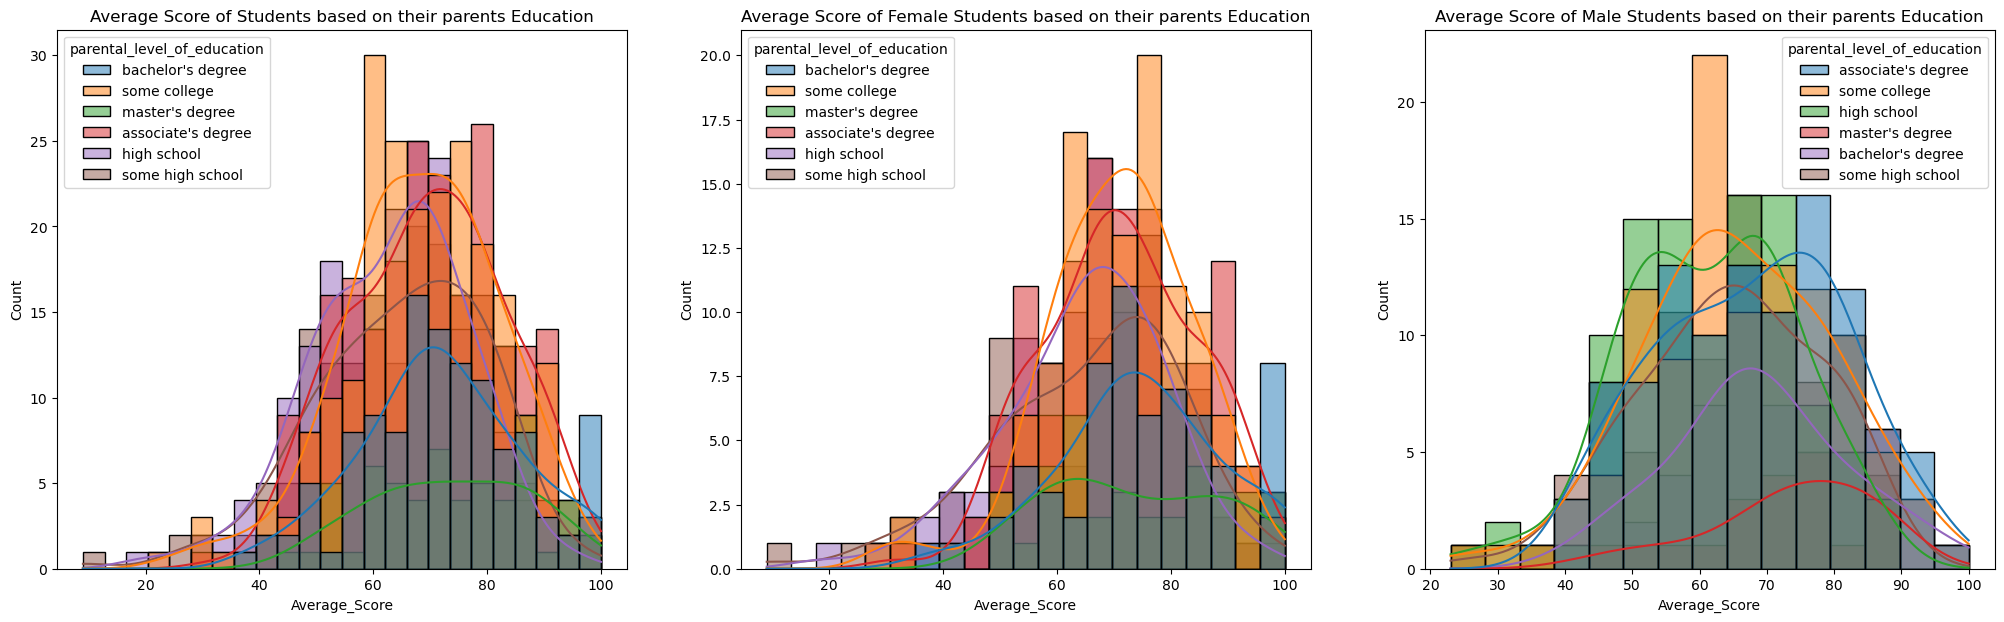

In [19]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data,x='Average_Score',hue='parental_level_of_education',kde=True)
plt.title('Average Score of Students based on their parents Education')

plt.subplot(132)
sns.histplot(data=data[data.gender=='female'],x='Average_Score',hue='parental_level_of_education',kde=True)
plt.title('Average Score of Female Students based on their parents Education')

plt.subplot(133)
sns.histplot(data=data[data.gender=='male'],x='Average_Score',hue='parental_level_of_education',kde=True)
plt.title('Average Score of Male Students based on their parents Education')

#### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students

C:\Users\ansari\AppData\Local\Temp\ipykernel_14408\2750783662.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\ansari\AppData\Local\Temp\ipykernel_14408\2750783662.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\ansari\AppData\Local\Temp\ipykernel_14408\2750783662.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


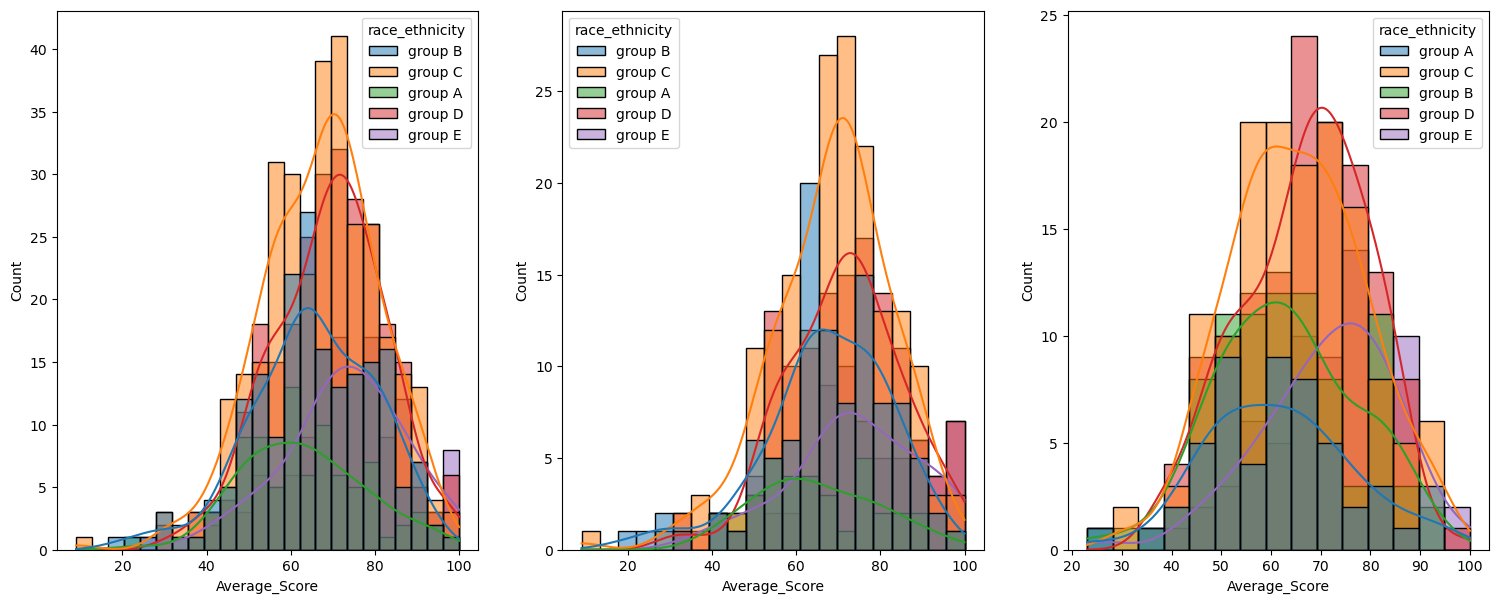

In [20]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=data,x='Average_Score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=data[data['gender']=='female'],x='Average_Score',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data[data['gender']=='male'],x='Average_Score',kde=True,hue='race_ethnicity')
plt.show()

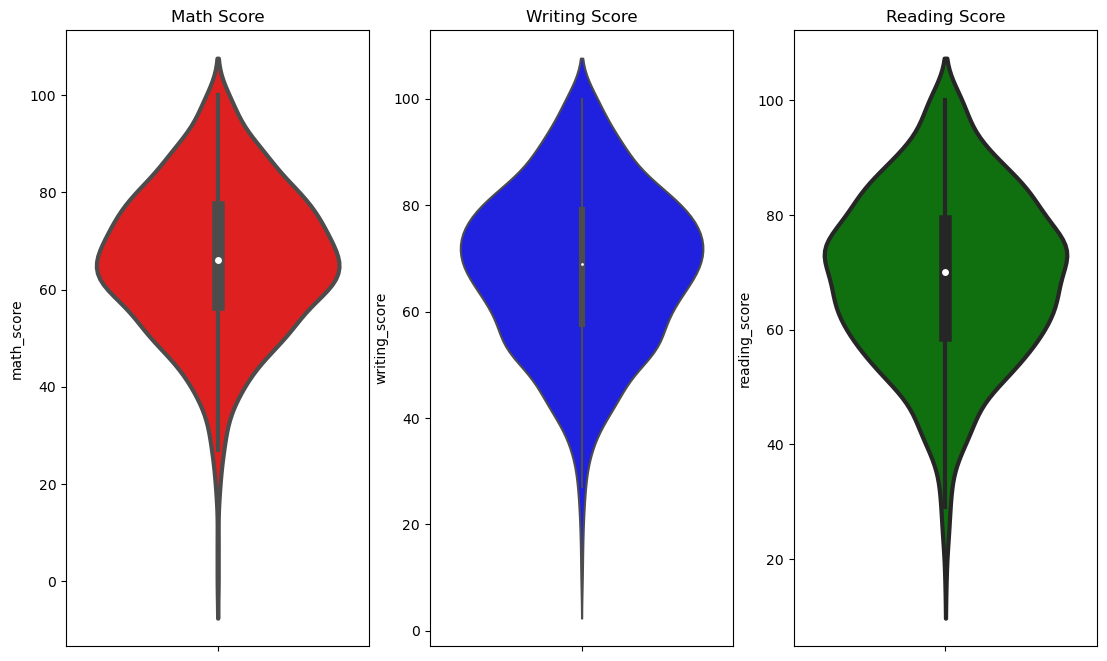

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Math Score')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Writing Score')
sns.violinplot(y='writing_score',data=data,color='blue',lineewidth=3)
plt.subplot(1,4,3)
plt.title('Reading Score')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Multivariate Analysis

In [22]:
from random import random

([<matplotlib.patches.Wedge at 0x21eff39e1d0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'none'),
  Text(0.4746018041084478, -0.9923472817199666, 'completed')],
 [Text(-0.2588736606535569, 0.5412803597211218, '.64.2%'),
  Text(0.2588737113318806, -0.5412803354836181, '.35.8%')])

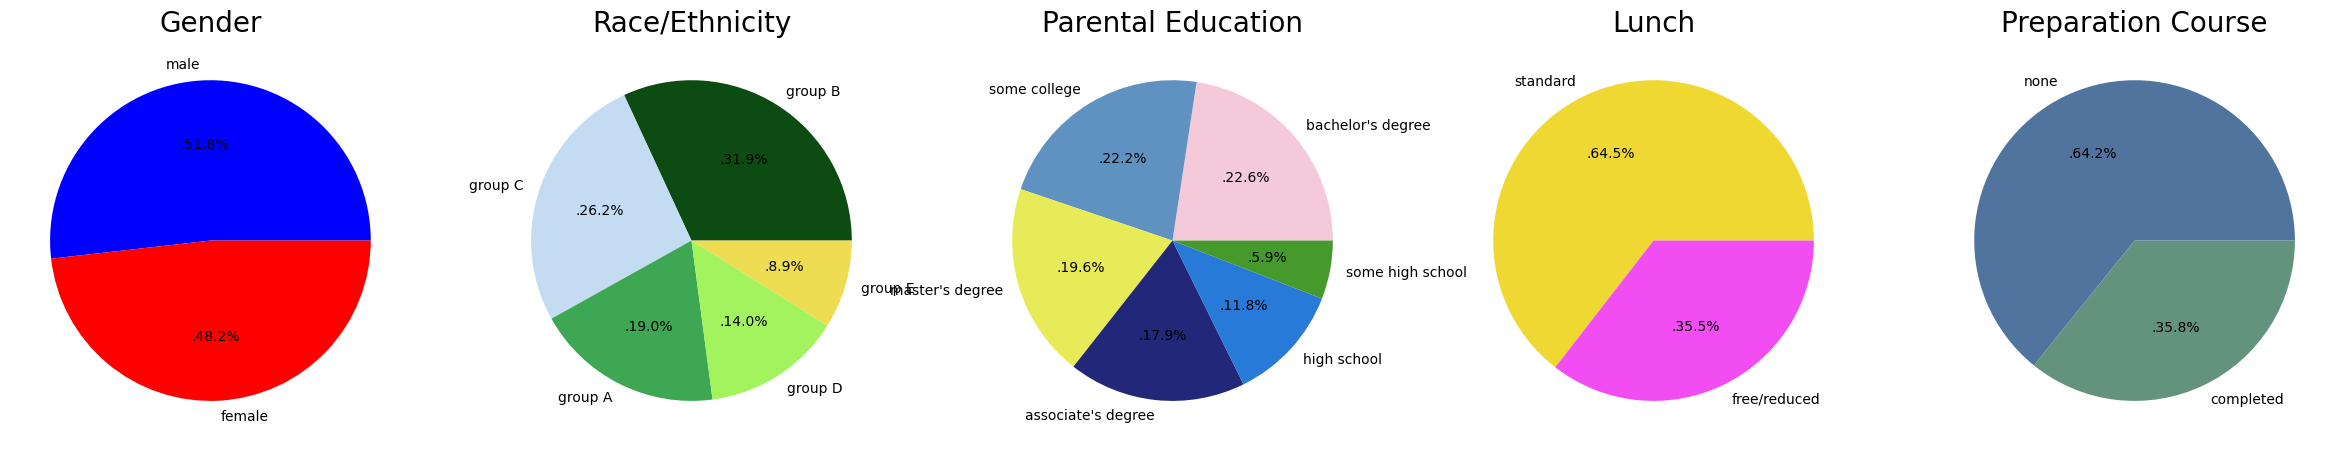

In [23]:
plt.rcParams['figure.figsize']=((30,15))

plt.subplot(1,5,1)
size=data['gender'].value_counts()
labels='male','female'
color='blue','red'

plt.title('Gender', fontsize=20)
plt.pie(size,labels=labels,colors=color,autopct='.%1.1f%%')

plt.subplot(1,5,2)
size=data['race_ethnicity'].value_counts()
labels=data['race_ethnicity'].unique()
colors=[(random(),random(),random()) for i in range(len(labels))]

plt.title('Race/Ethnicity', fontsize=20)
plt.pie(size,labels=labels,colors=colors,autopct='.%1.1f%%')

plt.subplot(1,5,3)
size=data['parental_level_of_education'].value_counts()
labels=data['parental_level_of_education'].unique()
colors=[(random(),random(),random()) for i in range(len(labels))]

plt.title('Parental Education', fontsize=20)
plt.pie(size,labels=labels,colors=colors,autopct='.%1.1f%%')

plt.subplot(1,5,4)
size=data['lunch'].value_counts()
labels=data['lunch'].unique()
colors=[(random(),random(),random()) for i in range(len(labels))]

plt.title('Lunch', fontsize=20)
plt.pie(size,labels=labels,colors=colors,autopct='.%1.1f%%')

plt.subplot(1,5,5)
size=data['test_preparation_course'].value_counts()
labels=data['test_preparation_course'].unique()
colors=[(random(),random(),random()) for i in range(len(labels))]

plt.title('Preparation Course', fontsize=20)
plt.pie(size,labels=labels,colors=colors,autopct='.%1.1f%%')

In [24]:
random(),random(),random()

(0.9245805543511961, 0.9154394031859638, 0.9067102284878437)

C:\Users\ansari\AppData\Local\Temp\ipykernel_14408\2025811714.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))


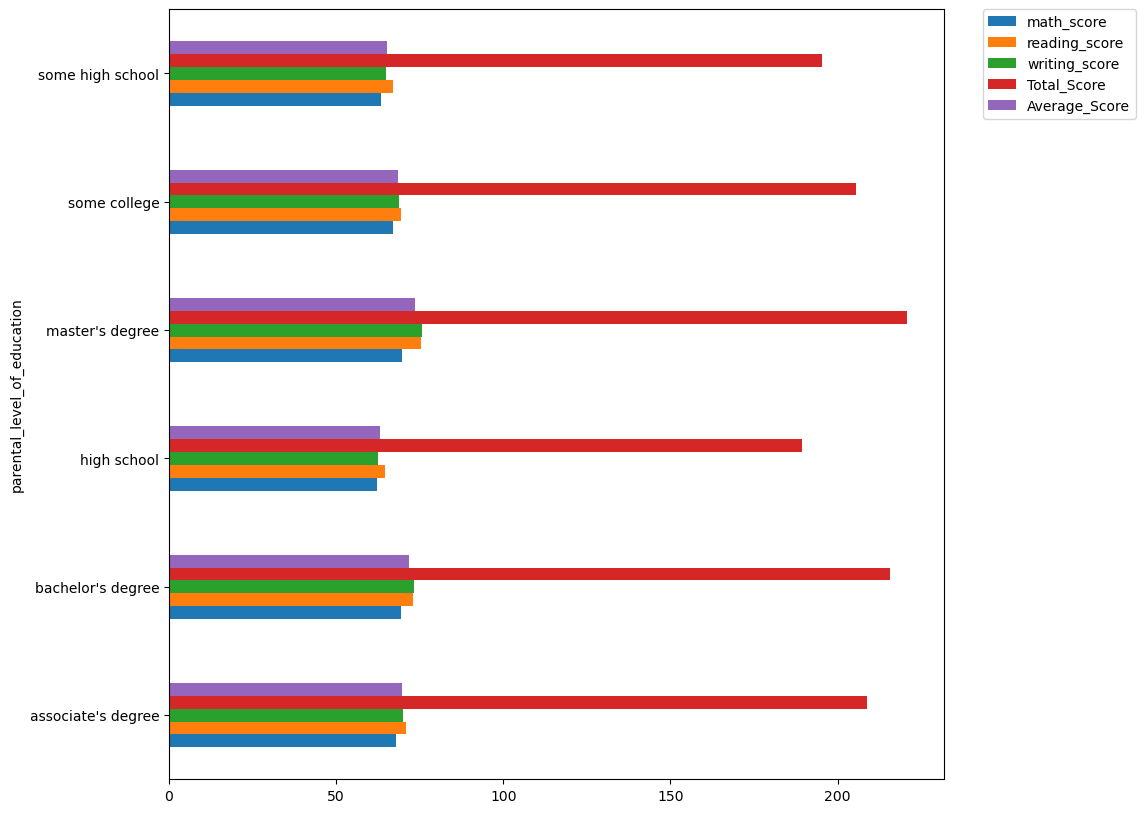

In [25]:
data.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

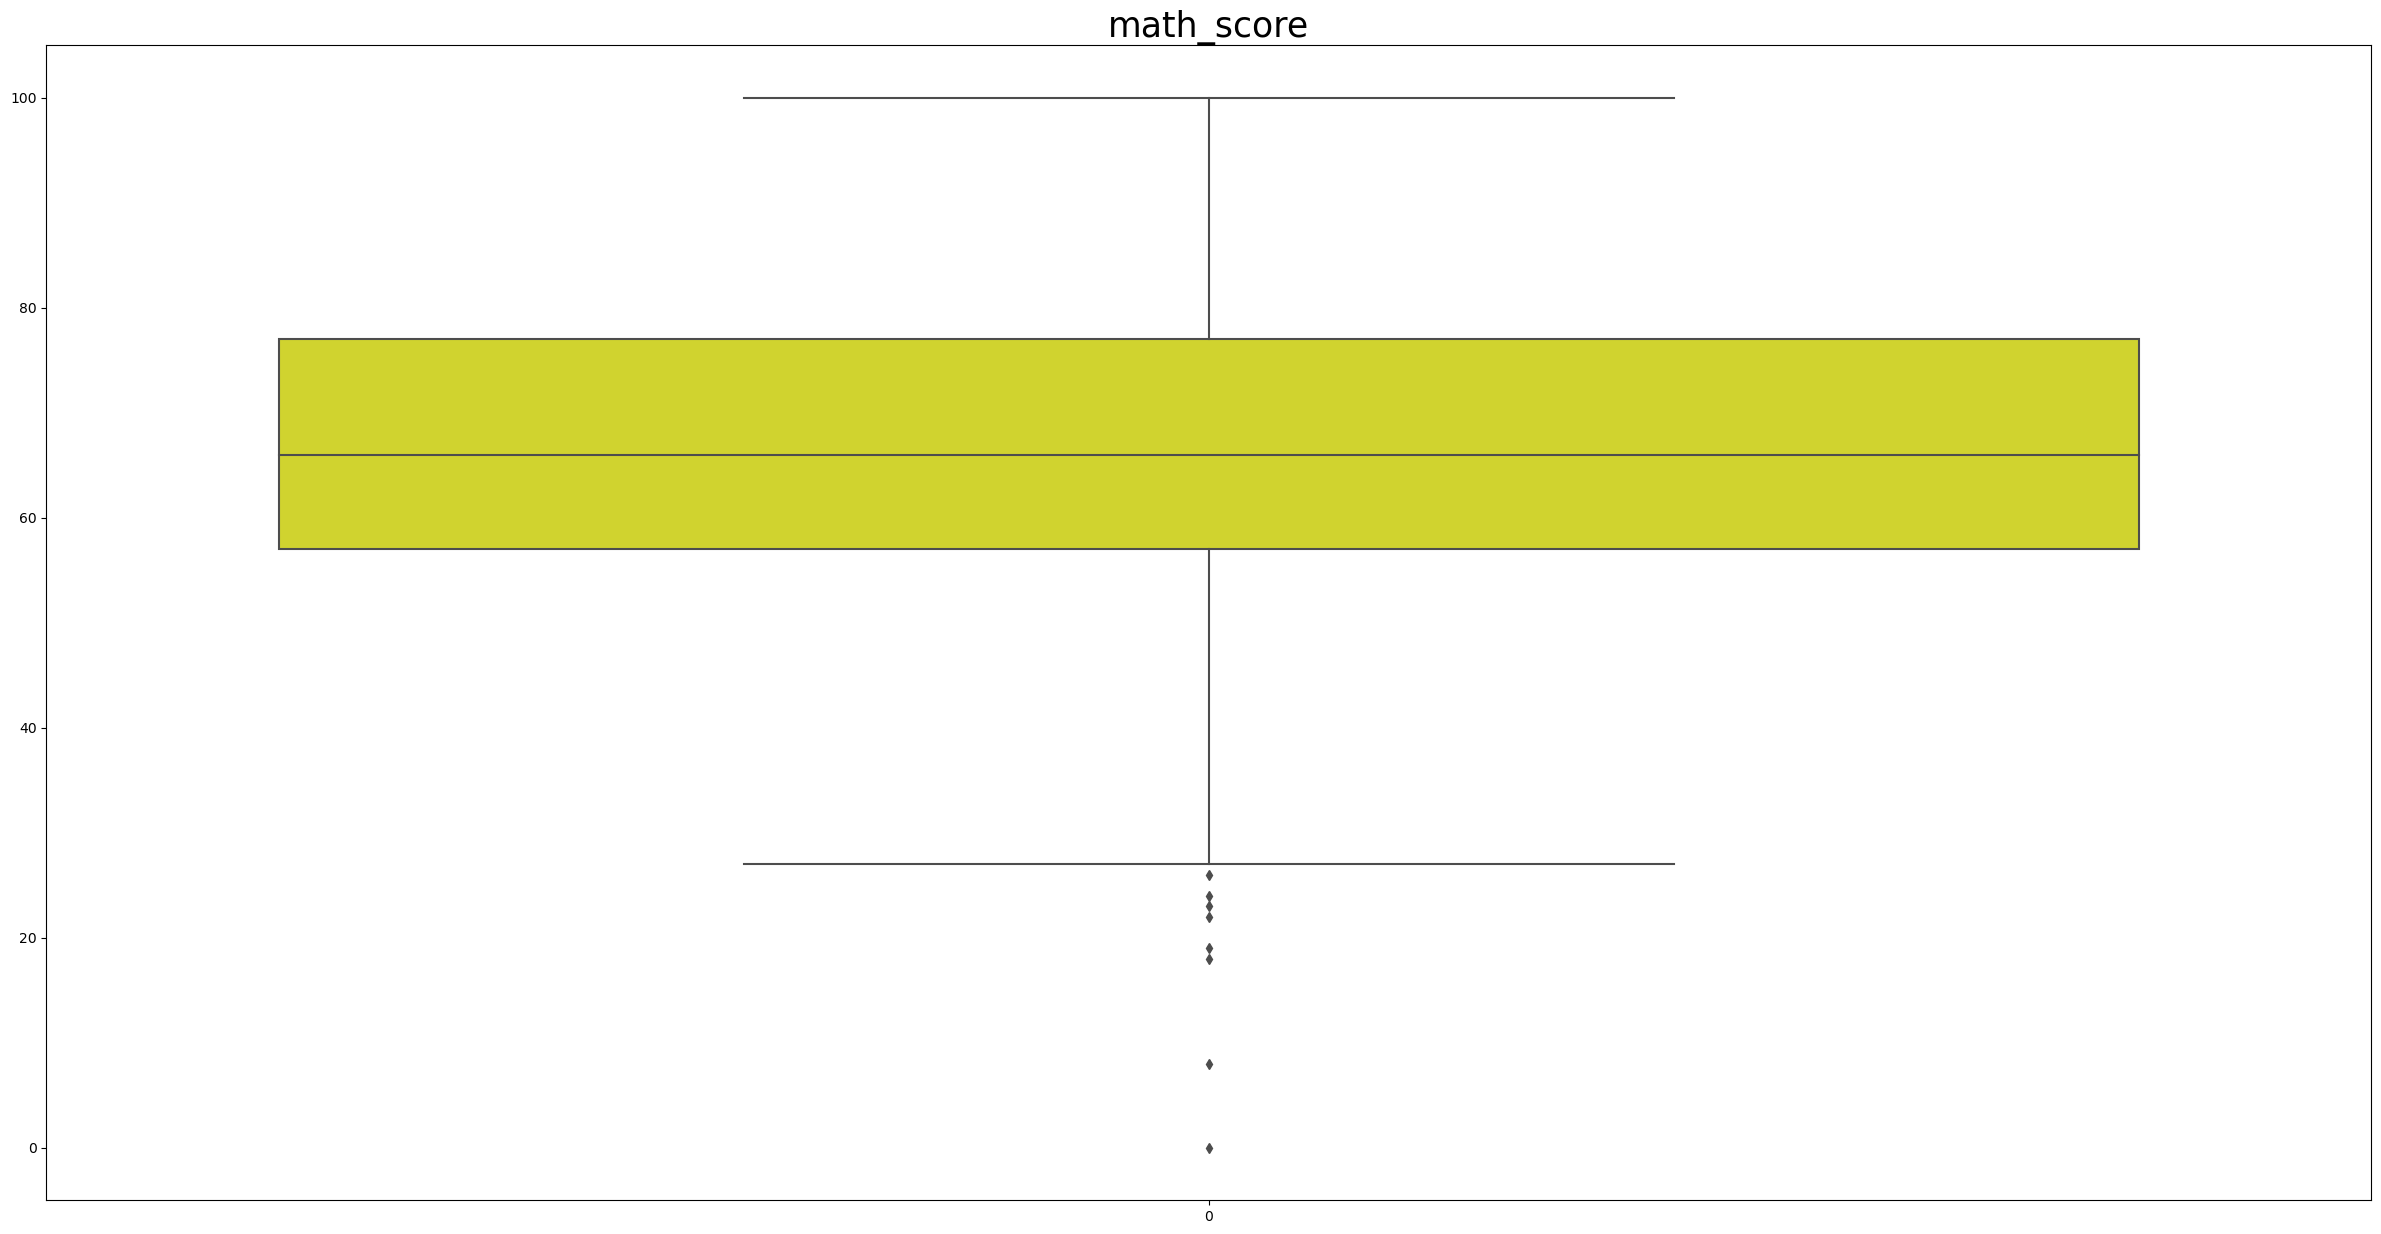

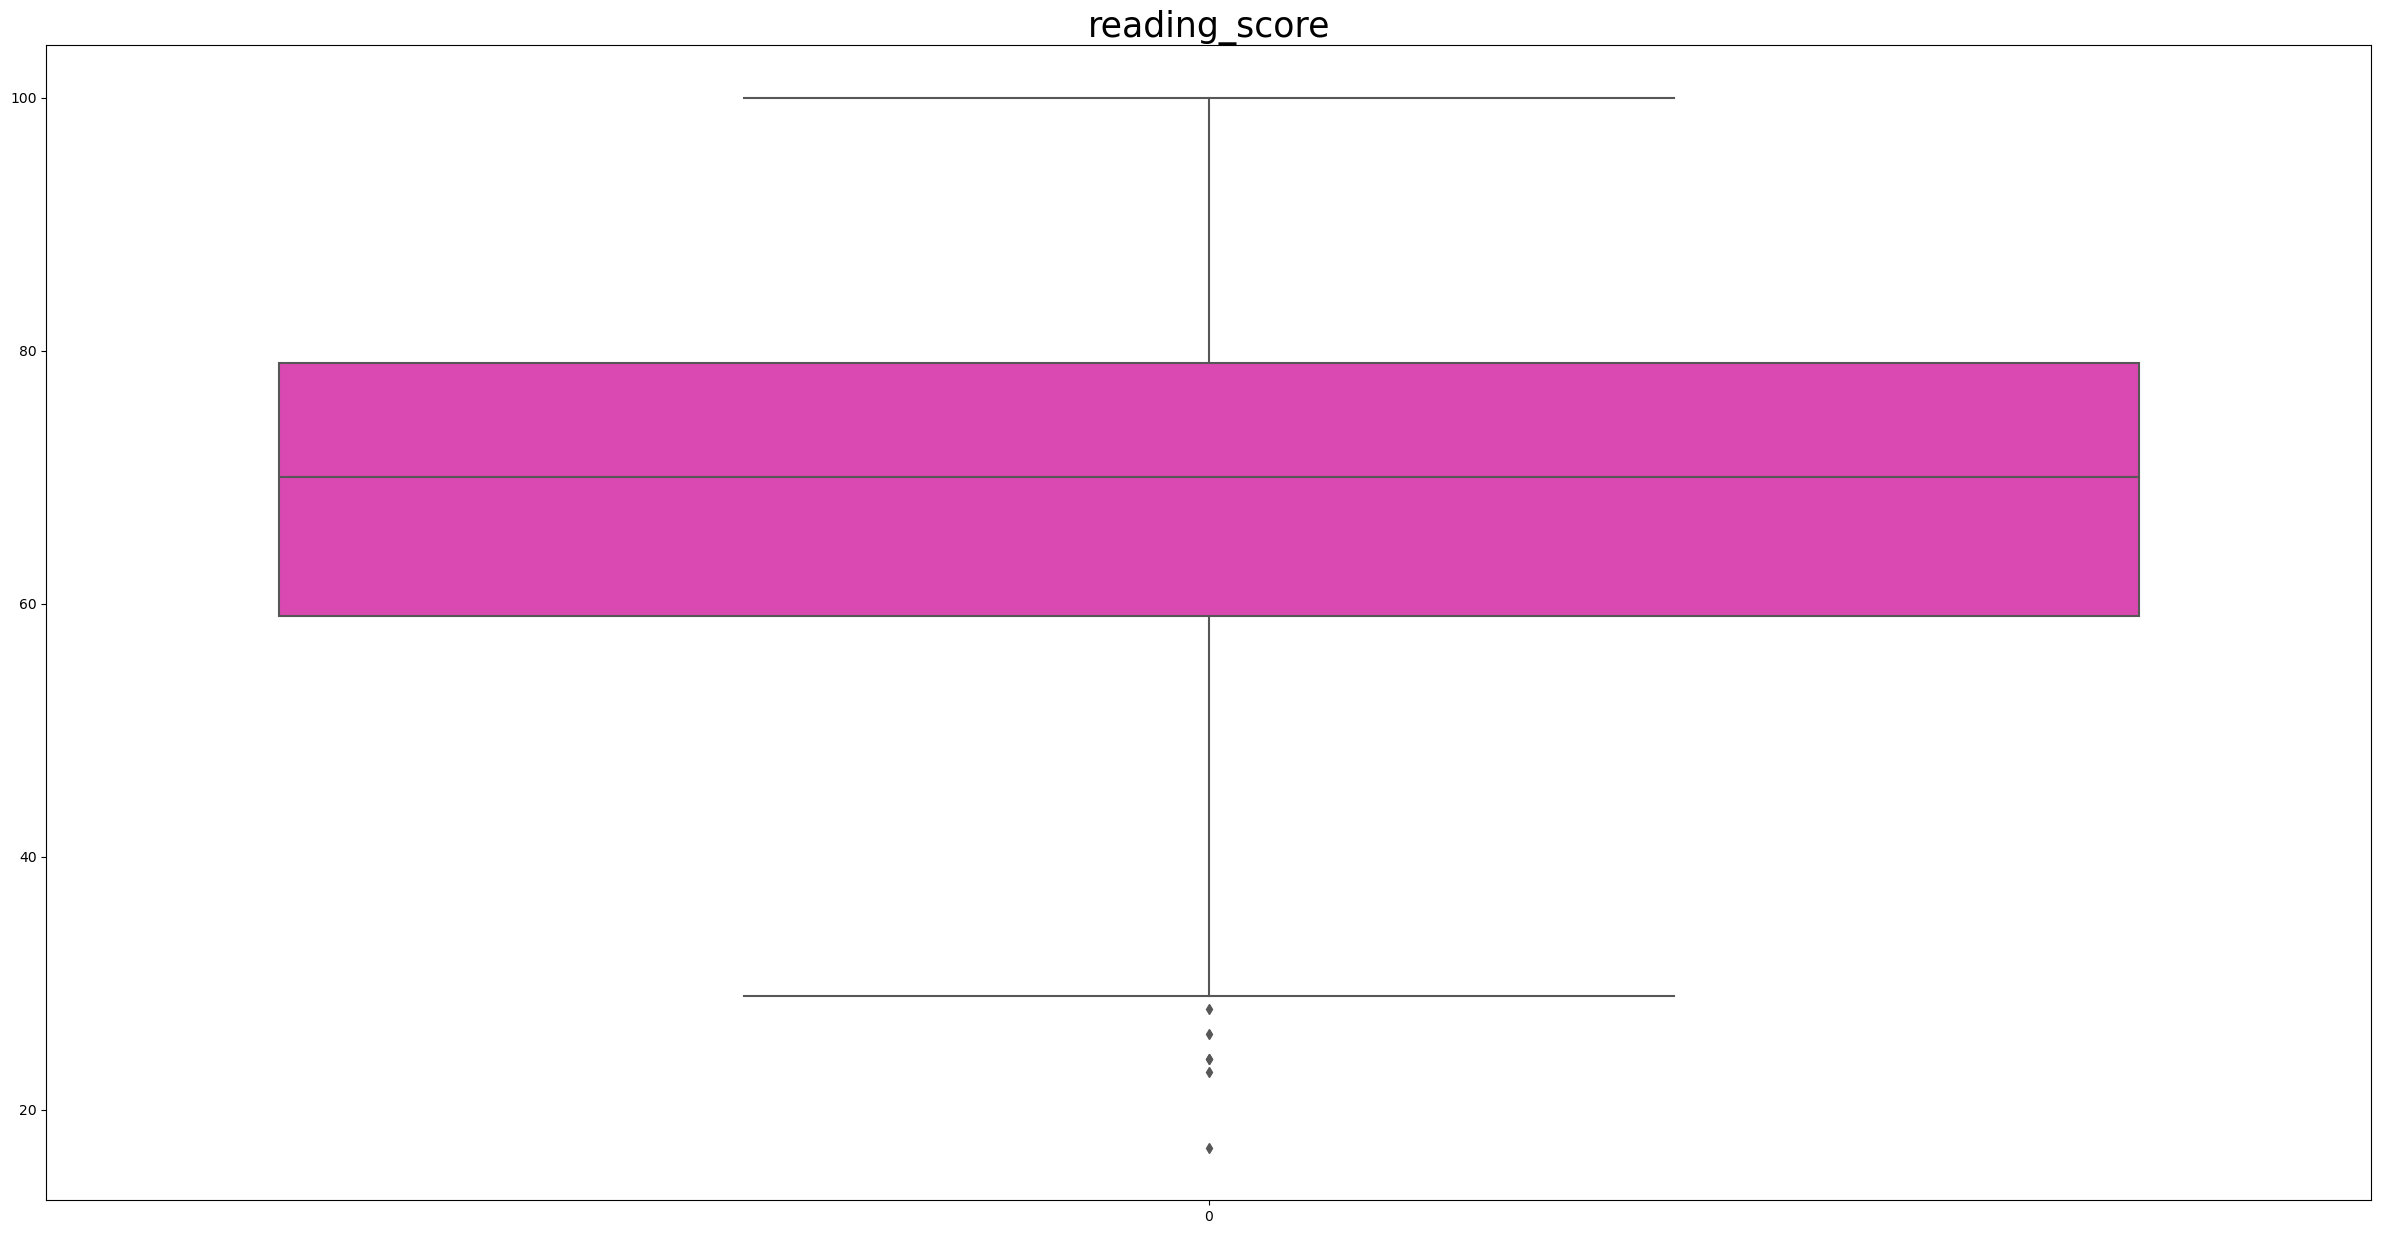

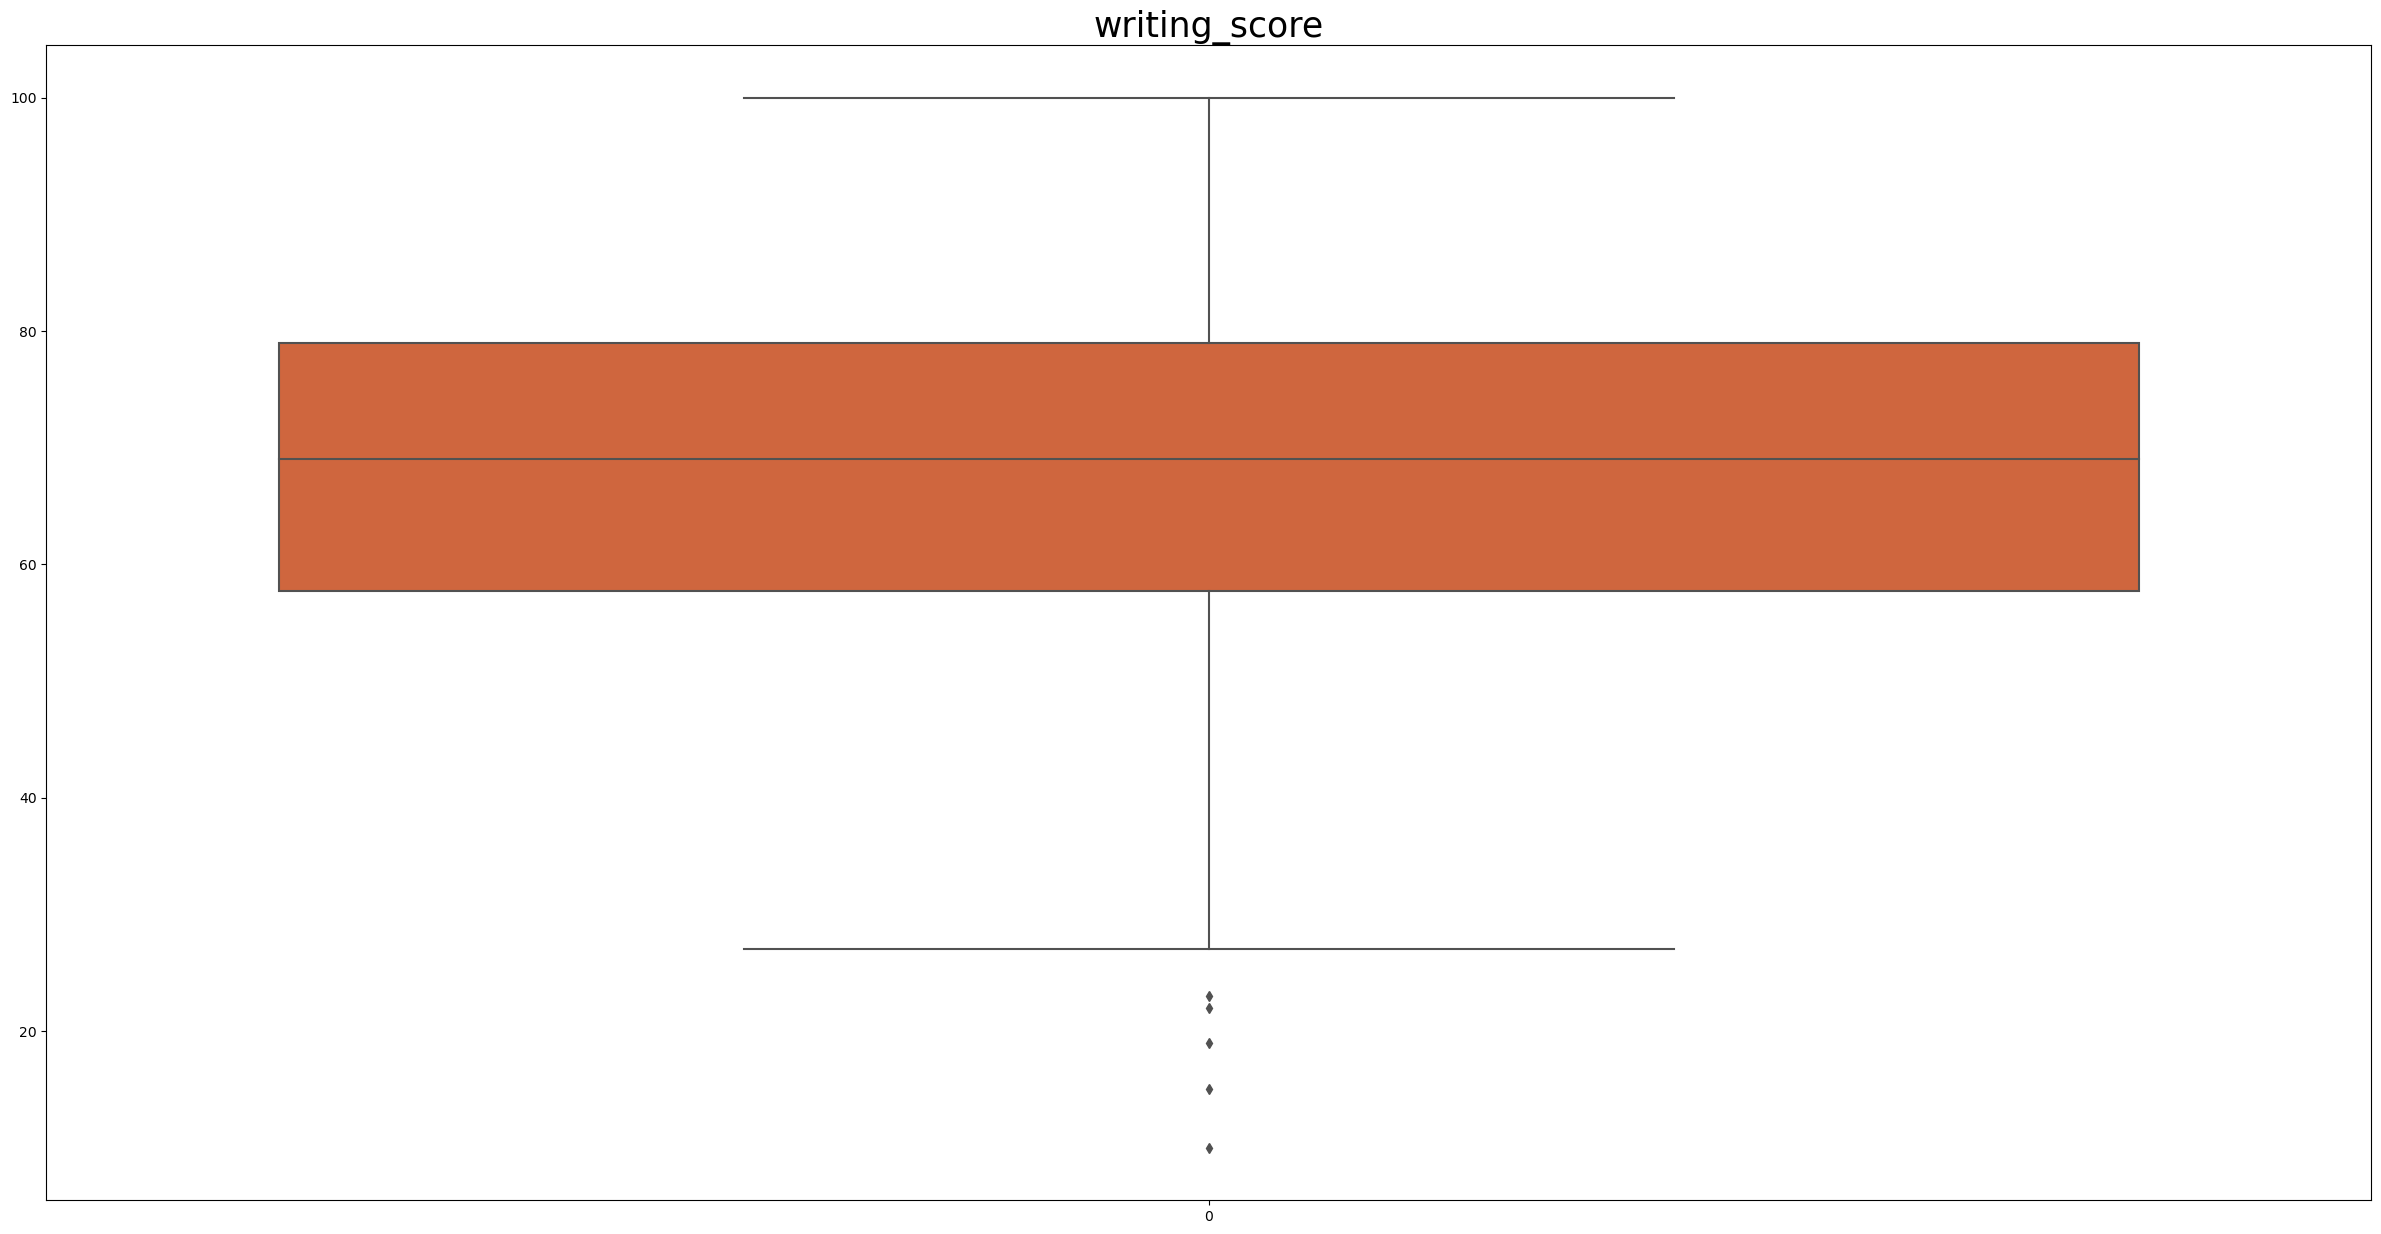

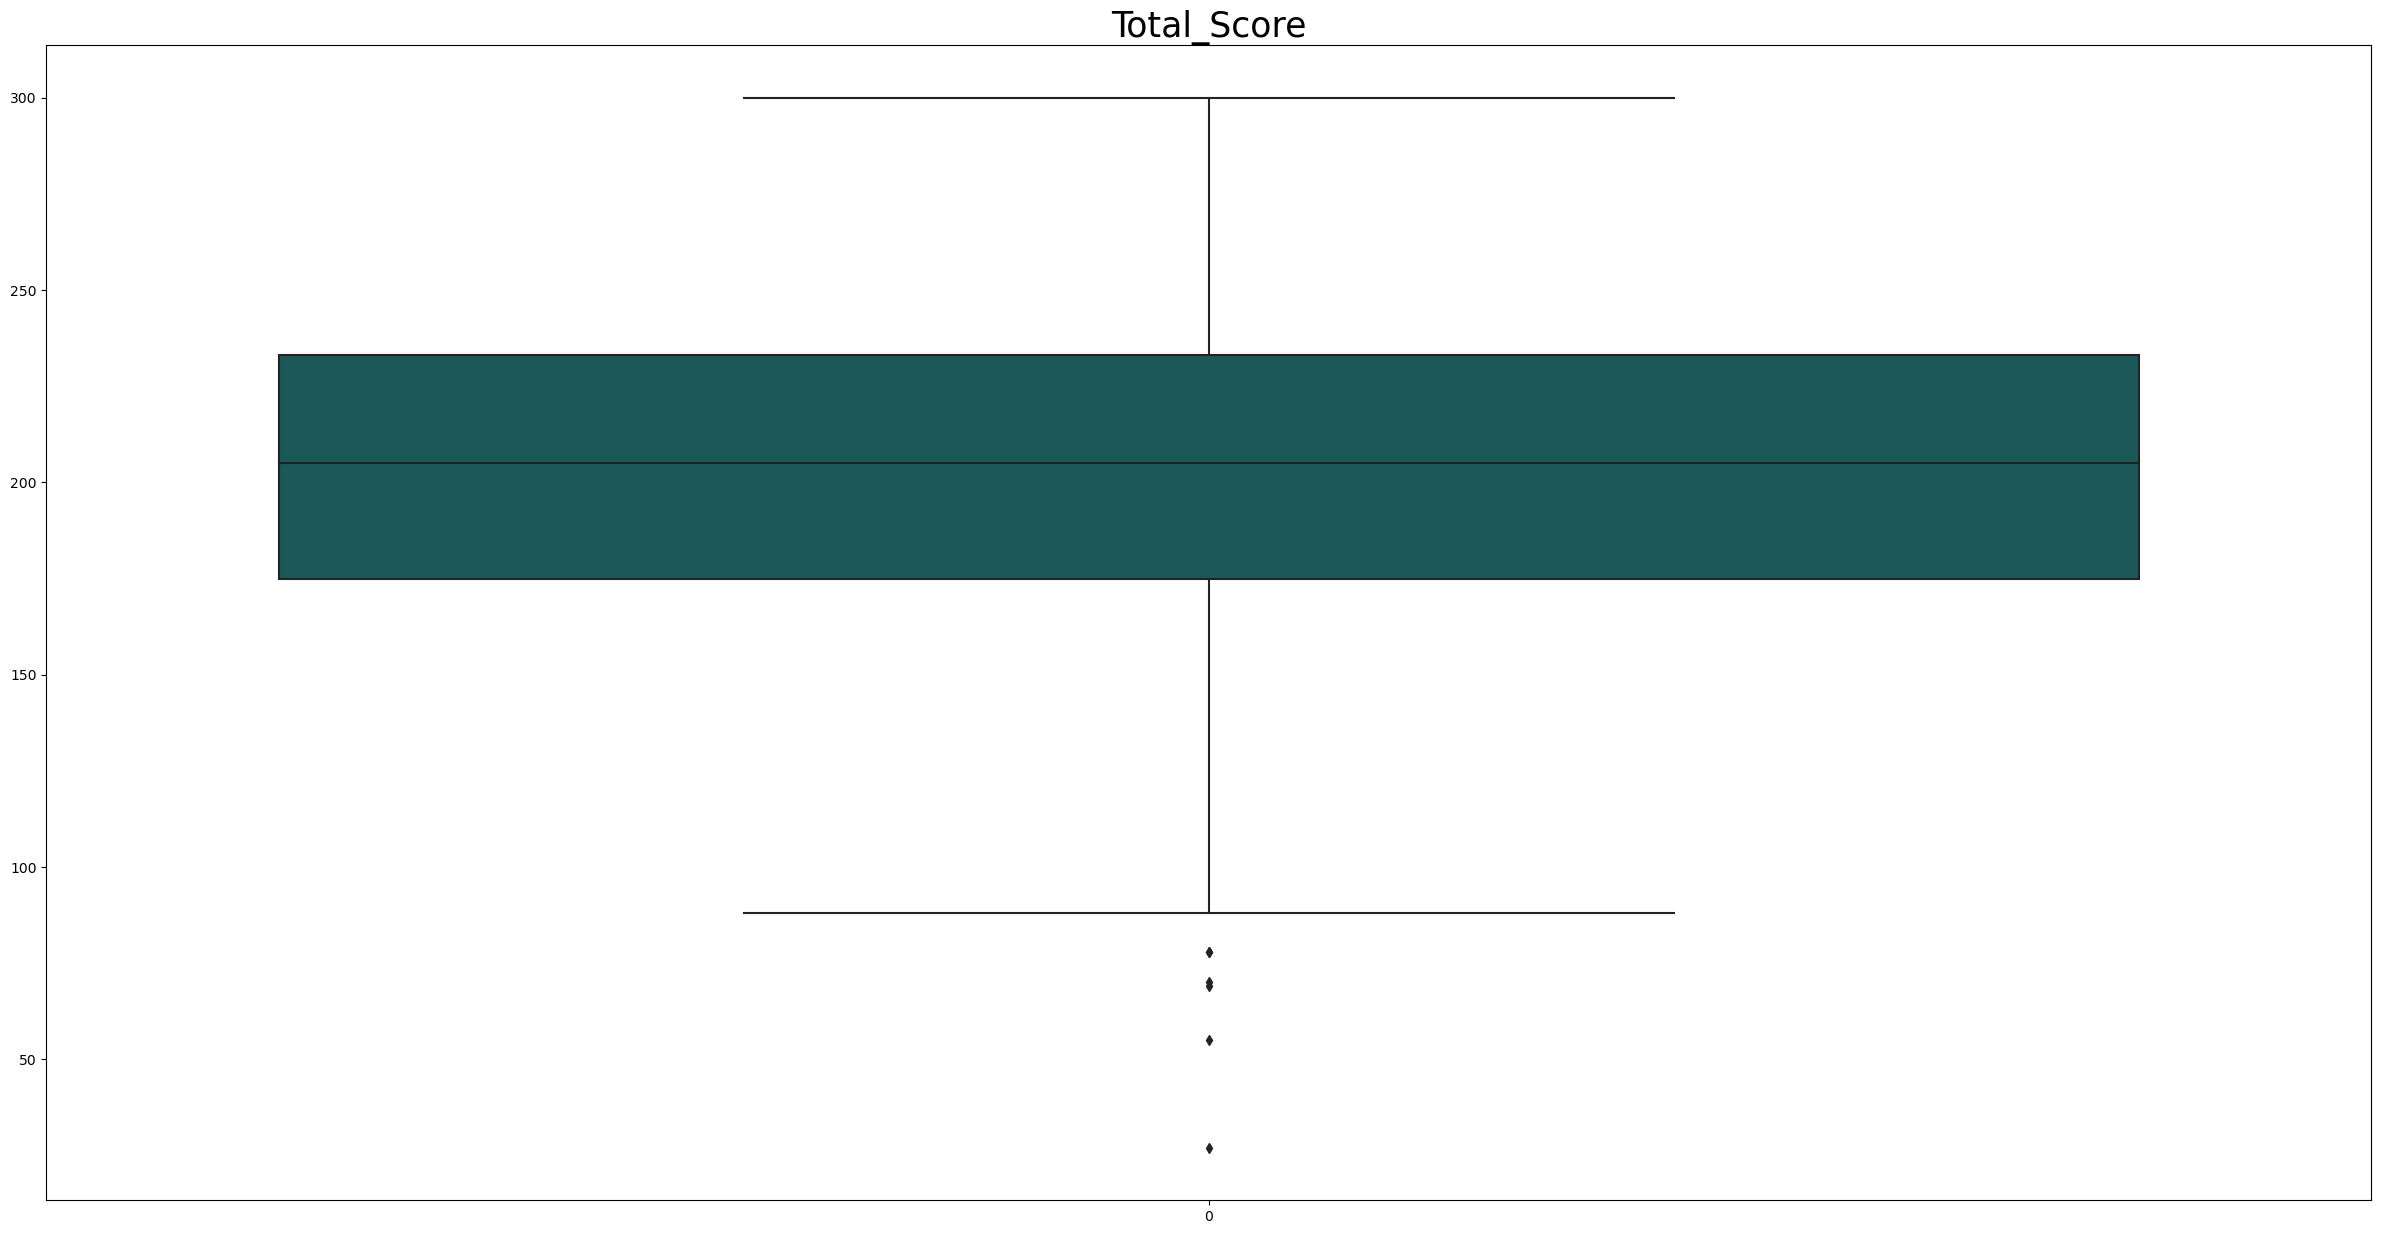

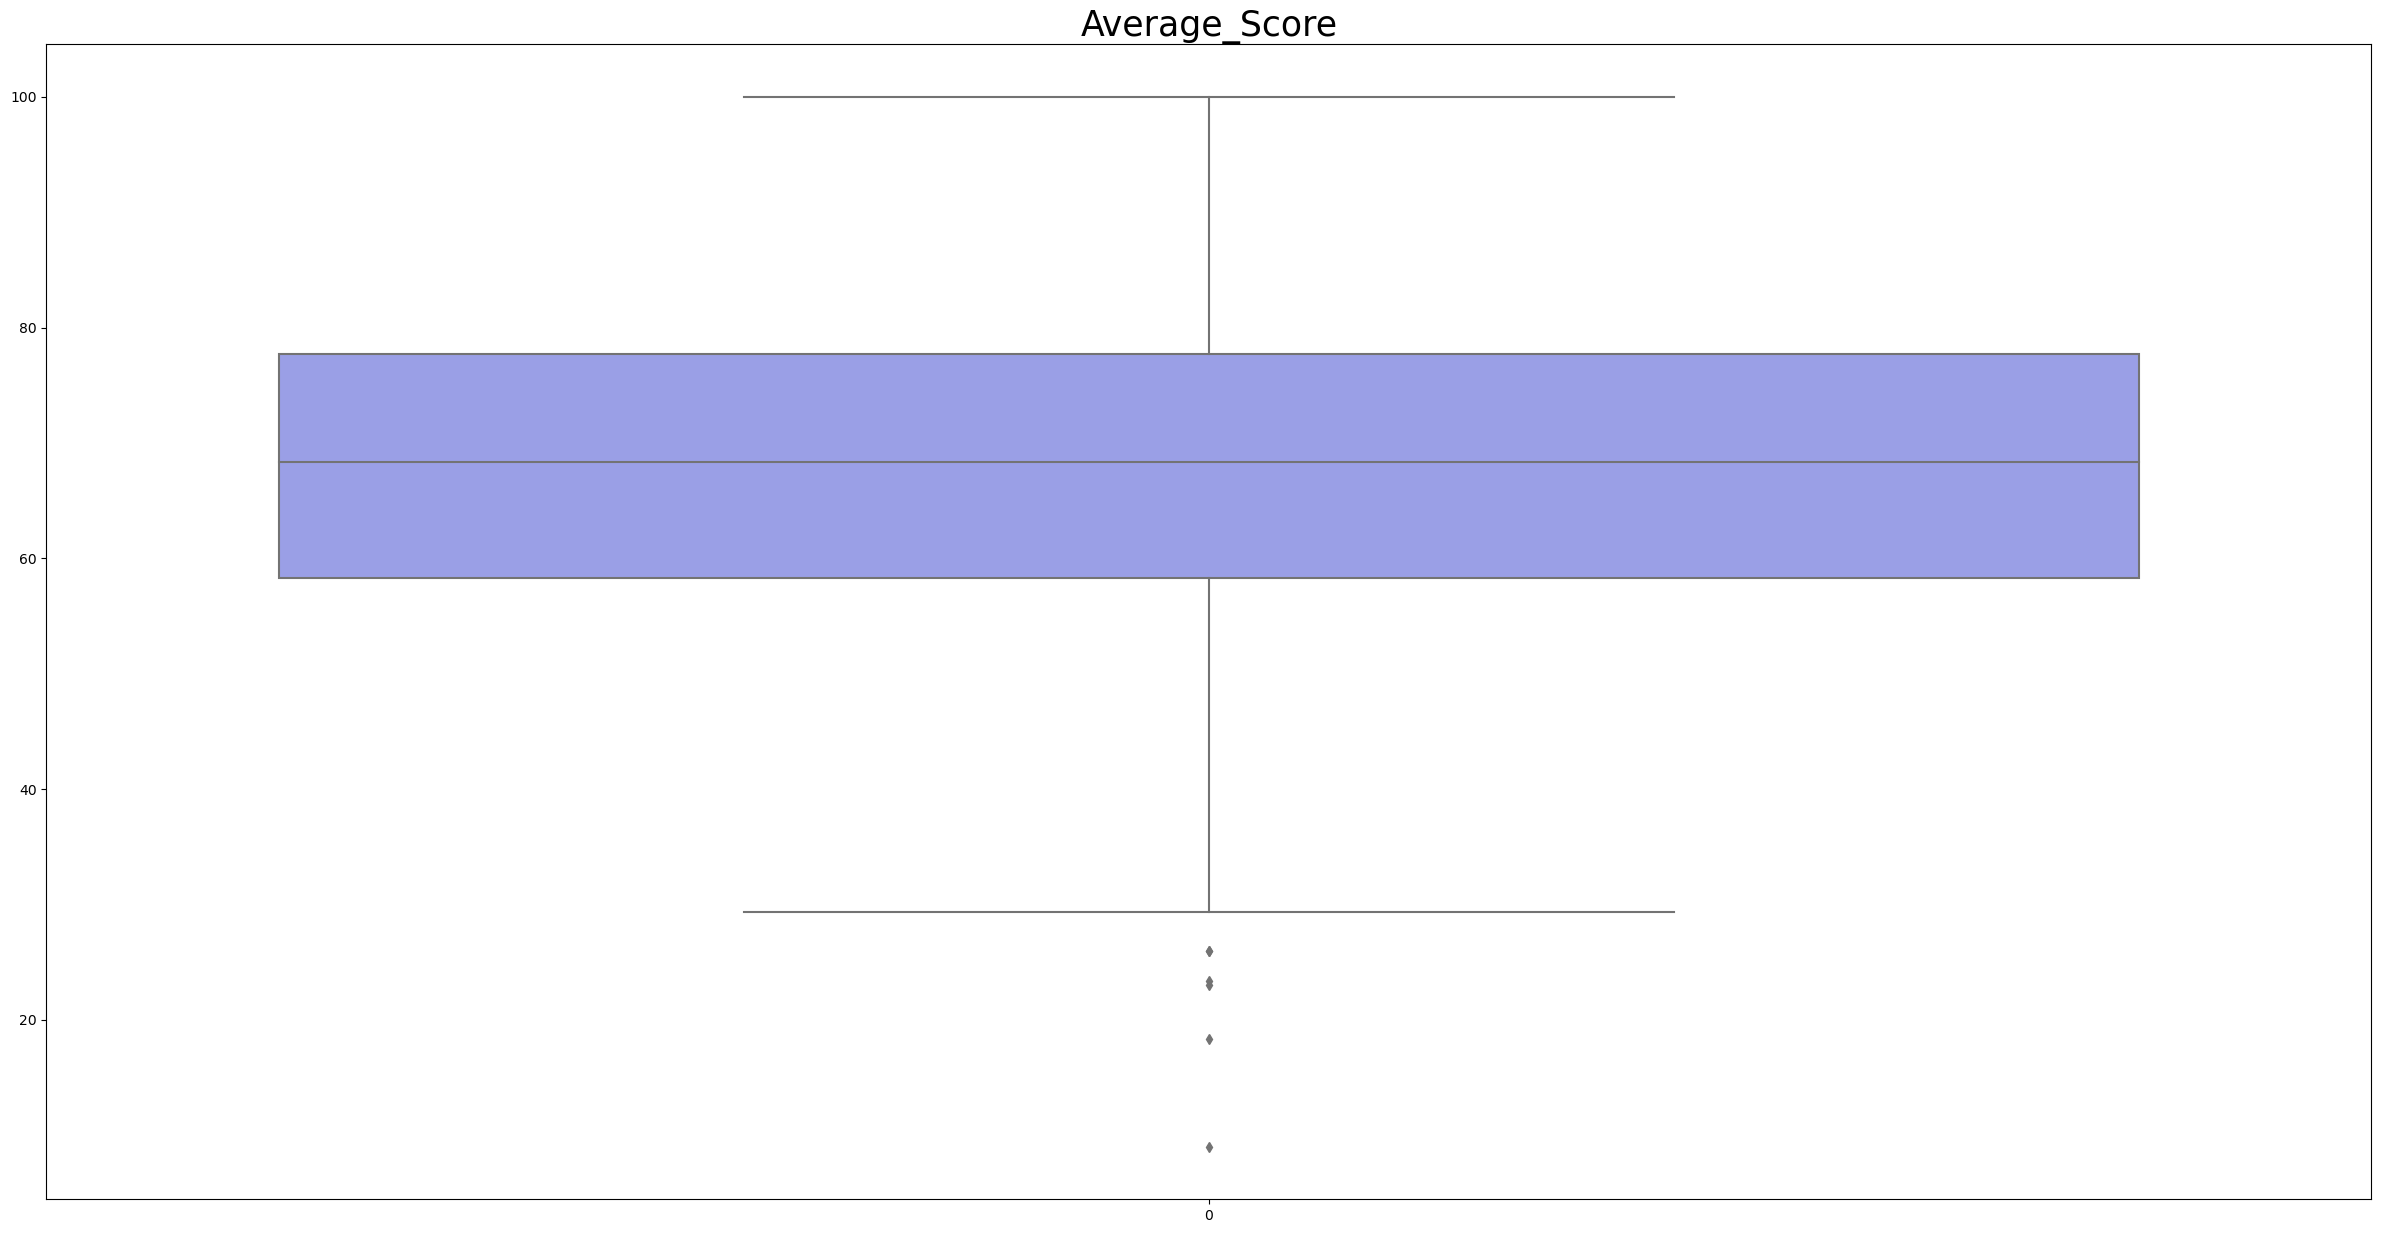

In [26]:
numerical_features = [column for column in data.columns if data[column].dtype!='O' ]
for col in numerical_features:
    plt.title(col,fontsize=25)
    sns.boxplot(data[col],color=(random(),random(),random()))
    plt.show()

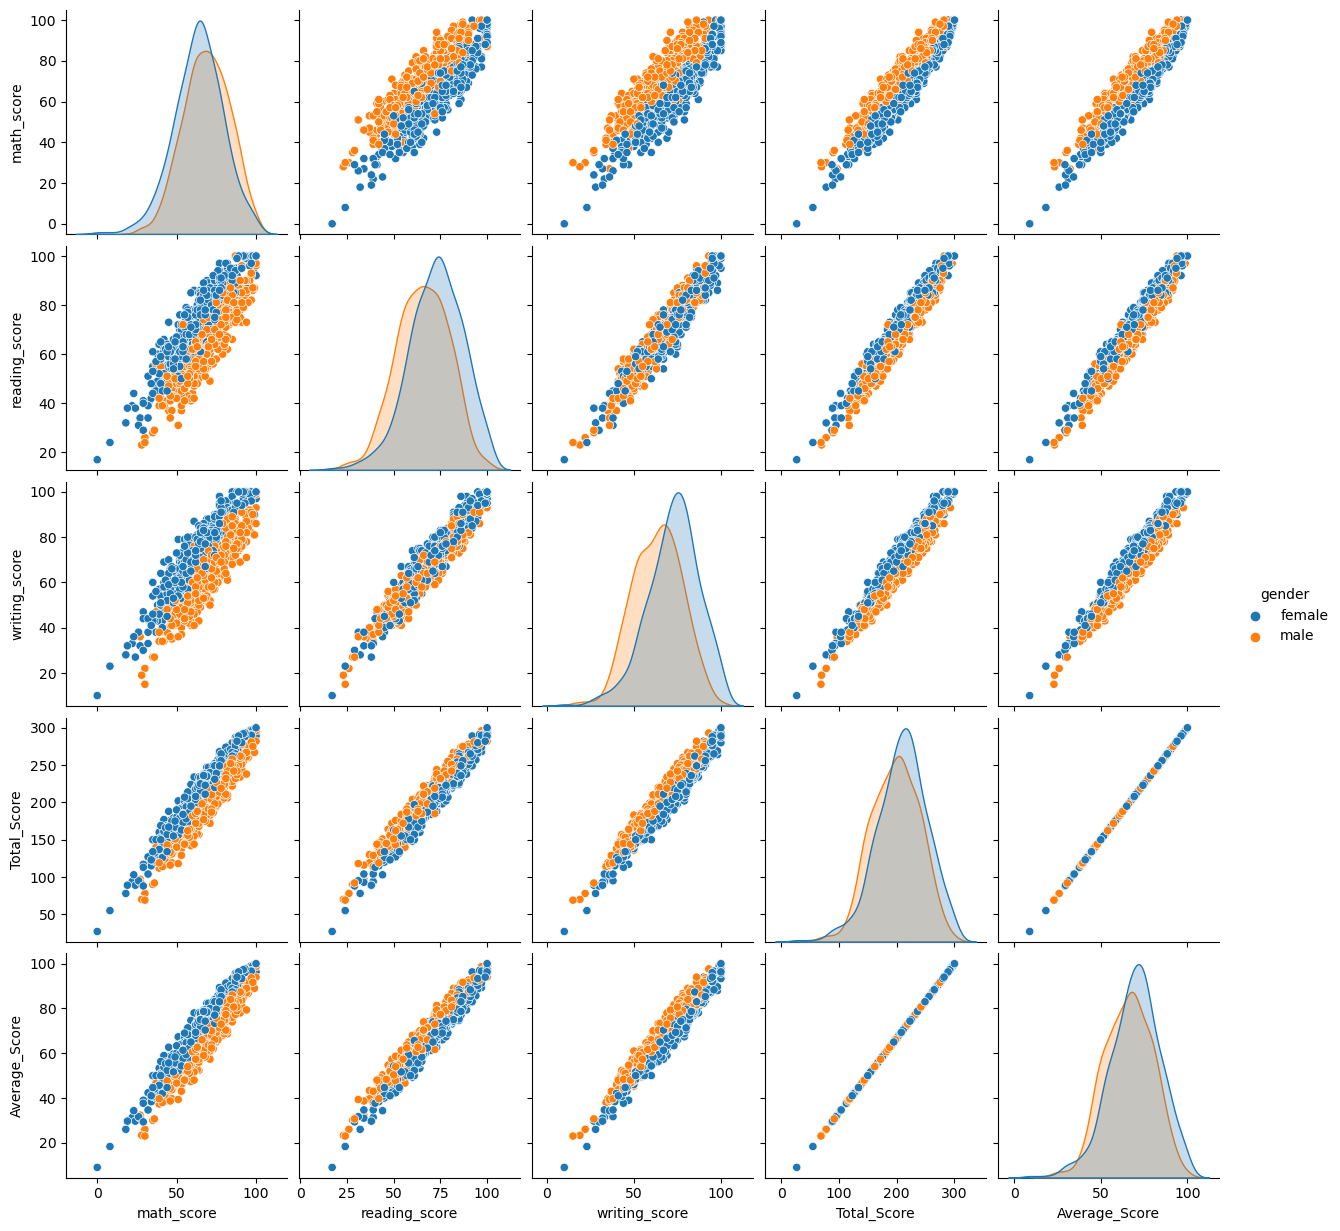

In [85]:
sns.pairplot(data,hue='gender')
plt.show()